# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Indonesia Di Tahun 2017

## 1. Import Library & Load Dataset Dari Local Device

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_2017 = pd.read_excel("Data Tahun 2017.xlsx")
data_2017.head()

,date,content,label
0,2017-12-29 08:09:29+00:00,@PenDjaca @herditiya1 berharap menkeu meralat ...,negatif
1,2017-12-28 02:12:13+00:00,@tonywibowo12 @Michael24007966 @triwul82 @semi...,positif
2,2017-12-27 12:32:16+00:00,@detikfinance Aduh anies jng mgeliatin bego ny...,positif
3,2017-12-26 13:01:10+00:00,Emangnya Anies lakukan kmpanye hitam.Dmn.Apa m...,positif
4,2017-12-26 08:29:32+00:00,@Dahnilanzar Anies itu toleran kalau menguntun...,positif


In [3]:
# Mengecek tipe data dan juga apakah di dalam data memiliki nilai NaN/tidak
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1800 non-null   object
 1   content  1800 non-null   object
 2   label    1800 non-null   object
dtypes: object(3)
memory usage: 42.3+ KB


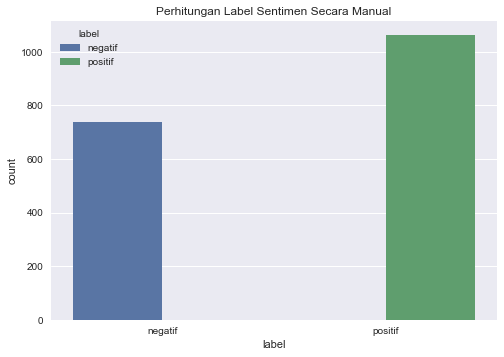

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "label"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="label", hue="label", data=data_2017)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jumlah_content = data_2017.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jumlah_content.style.background_gradient(cmap="summer")

,label,content
1,positif,1062
0,negatif,738


Dapat dilihat dari perhitungan diatas, dari 1800 jumlah data netizen twitter ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 1062 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 738.

## 2. Text Processing (Cleansing, Case Folding, Tokenizing, Stopwords & Stemming)

### Cleansing Teks

In [6]:
# Menghilangkan tweet dan username dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data_2017["content"] = data_2017["content"].apply(bersih_text)

data_2017.head()

,date,content,label
0,2017-12-29 08:09:29+00:00,PenDjaca herditiya1 berharap menkeu meralat p...,negatif
1,2017-12-28 02:12:13+00:00,tonywibowo12 Michael24007966 triwul82 semiaji...,positif
2,2017-12-27 12:32:16+00:00,detikfinance Aduh anies jng mgeliatin bego ny...,positif
3,2017-12-26 13:01:10+00:00,Emangnya Anies lakukan kmpanye hitam Dmn Apa m...,positif
4,2017-12-26 08:29:32+00:00,Dahnilanzar Anies itu toleran kalau menguntun...,positif


In [7]:
# Menghapus spasi pada kolom "label"
data_2017.label = list(map(lambda x: x.strip(), data_2017.label))
data_2017.head()

,date,content,label
0,2017-12-29 08:09:29+00:00,PenDjaca herditiya1 berharap menkeu meralat p...,negatif
1,2017-12-28 02:12:13+00:00,tonywibowo12 Michael24007966 triwul82 semiaji...,positif
2,2017-12-27 12:32:16+00:00,detikfinance Aduh anies jng mgeliatin bego ny...,positif
3,2017-12-26 13:01:10+00:00,Emangnya Anies lakukan kmpanye hitam Dmn Apa m...,positif
4,2017-12-26 08:29:32+00:00,Dahnilanzar Anies itu toleran kalau menguntun...,positif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil.

### Case Folding

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data_2017["content"] = data_2017["content"].str.lower()

data_2017.head()

,date,content,label
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data_2017["content_tokenizing"] = data_2017["content"].apply(tokennization)
data_2017.head()

,date,content,label,content_tokenizing
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif,"[pendjaca, herditiya1, berharap, menkeu, meral..."
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif,"[tonywibowo12, michael24007966, triwul82, semi..."
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif,"[detikfinance, aduh, anies, jng, mgeliatin, be..."
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif,"[emangnya, anies, lakukan, kmpanye, hitam, dmn..."
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif,"[dahnilanzar, anies, itu, toleran, kalau, meng..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
# Proses Filtering dari kolom "Tweet_Tokenizing"
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", "seraya", "seterusnya", 
               "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "nggak", "mari", "nanti", "melainkan", "oh", "ok",
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap", "apakah", "kecuali", "sebab", "selain"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data_2017["content_stopwords"] = data_2017["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data_2017["content_stopwords"] = data_2017["content_stopwords"].apply(stopwords_removal)
data_2017.head()

,date,content,label,content_tokenizing,content_stopwords
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif,"[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, berharap, menkeu, meral..."
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif,"[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi..."
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif,"[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be..."
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif,"[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emangnya, anies, lakukan, kmpanye, hitam, dmn..."
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif,"[dahnilanzar, anies, itu, toleran, kalau, meng...","[dahnilanzar, anies, toleran, menguntungkan, e..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_stopwords"
for document in data_2017["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data_2017["content_stemming"] = data_2017["content_stopwords"].swifter.apply(stemming_word)

8462
------------------------
pendjaca : pendjaca
herditiya1 : herditiya1
berharap : harap
menkeu : menkeu
meralat : ralat
pernyataannya : nyata
pembenci : benci
anies : anies
sandi : sandi
keliatan : liat
bego : bego
tonywibowo12 : tonywibowo12
michael24007966 : michael24007966
triwul82 : triwul82
semiaji : semiaji
w : w
tetapahokdjarot : tetapahokdjarot
aniesbaswedan : aniesbaswedan
suaraanies : suaraanies
kpk : kpk
ri : ri
jokowi : jokowi
ruhutsitompul : ruhutsitompul
tjahjo : tjahjo
kumolo : kumolo
anti : anti
sdh : sdh
salah : salah
baca : baca
berita : berita
gak : gak
dasar : dasar
guoblok : guoblok
tinggal : tinggal
dijakarta : dijakarta
kalo : kalo
berani : berani
langsung : langsung
datengin : datengin
napa : napa
kritik : kritik
hebat : hebat
bicara : bicara
medsos : medsos
haha : haha
jkrta : jkrta
mikiiirrr : mikiiirrr
tong : tong
detikfinance : detikfinance
aduh : aduh
jng : jng
mgeliatin : mgeliatin
nya : nya
elo : elo
srimulyani : srimulyani
udh : udh
manajer : manajer


org2 : org2
lho : lho
blum : blum
camatnya : camat
syifni : syifni
dibilang : bilang
distop : stop
dianggarin : dianggarin
kko : kko
urusan : urus
selesai : selesai
kecamatan : camat
balaikota : balaikota
males : males
jogyeskarta1 : jogyeskarta1
dennysiregar7 : dennysiregar7
orangnya : orang
zbmloxtm1k : zbmloxtm1k
bisa2 : bisa2
bodohi : bodoh
malu : malu
beliau : beliau
minarihirai : minarihirai
direkturnya : direktur
walk : walk
out : out
rame : rame
dll : dll
ngajak : ngajak
uninstall : uninstall
traveloka : traveloka
berjamaah : jamaah
pandji : pandji
sori : sori
nji : nji
dititik : titik
gua : gua
terbukti : bukti
sekelas : kelas
modal : modal
omong : omong
butuh : butuh
kayak : kayak
ezgb8enxhe : ezgb8enxhe
nay : nay
shihab : shihab
1bulan : 1bulan
admin : admin
imanuel20171 : imanuel20171
kurawa : rawa
laah : laah
undang : undang
kanisius : kanisius
dateng : dateng
sbg : sbg
pimpinan : pimpin
diundang : undang
bloon : bloon
blm : blm
stlh : stlh
piye : piye
vir : vir
maryadi033

unilubis : unilubis
hadeuh : hadeuh
skrng : skrng
dipengadilan : adil
hub : hub
penjajah : jajah
dilap : lap
polisi : polisi
aliansi : aliansi
korban : korban
tuntut : tuntut
sekda : sekda
saefullah : saefullah
plonga : plonga
plongo : plongo
balai : balai
alfyan : alfyan
justice : justice
dhory : dhory
hizkia : hizkia
bukti : bukti
media : media
noh : noh
buktinya : bukti
aslimanusiabodoh : aslimanusiabodoh
banikamvret : banikamvret
veverdi : veverdi
gmn : gmn
nich : nich
iwan : iwan
fals : fals
ckckck : ckckck
hamur666 : hamur666
cakbassoke : cakbassoke
budimannainggo7 : budimannainggo7
konteks : konteks
bro : bro
yaallah : yaallah
keturunan : turun
jahiliyah : jahiliyah
orangtua : orangtua
pesbuk : pesbuk
guru : guru
sma : sma
huh : huh
diem : diem
peduli : peduli
yaampun : yaampun
gemes : gemes
bahaya : bahaya
mls : mls
slordig : slordig
budget : budget
jauuuuuh : jauuuuuh
memecah : pecah
persatuan : satu
oyahyaputr : oyahyaputr
iyalah : iya
mang : mang
maksud : maksud
teks : teks


pdhl : pdhl
hadeuuhhh : hadeuuhhh
wagaberner : wagaberner
beny : beny
ide : ide
penggunaaan : penggunaaan
mengamankan : aman
natal : natal
simpati : simpati
edin : edin
eae18 : eae18
bantuin : bantuin
culong : culong
woles : woles
s4ncai : s4ncai
muhamma87797215 : muhamma87797215
tribunstyle : tribunstyle
basuki : basuki
ehh : ehh
belagu : belagu
dibully : dibully
kebodohannya : bodoh
dicintai : cinta
islamis : islamis
drpd : drpd
evcatzomhi : evcatzomhi
seiman : iman
faktor : faktor
yunar : yunar
ary : ary
gaj : gaj
hianati : hianati
buruh : buruh
aaja : aaja
rasain : rasain
halnya : hal
jutaan : juta
pemuja : puja
trumph : trumph
ane : ane
2012 : 2012
2017 : 2017
mendukung : dukung
diakhir : akhir
hati : hati
se2eucyzdb : se2eucyzdb
iyai : iya
toeni : toeni
kumparan : kumpar
dek : dek
bersuara : suara
disangka : sangka
icw : icw
sogok : sogok
mendingan : mending
dark : dark
pecatan : pecat
bermasalah : masalah
uni : uni
bahasa : bahasa
ampuh : ampuh
vw9s2pzixo : vw9s2pzixo
kasat : ka

mnytakn : mnytakn
tmukn : tmukn
tndk : tndk
pdna : pdna
korupsi : korupsi
smpe : smpe
dtk : dtk
bkti : bkti
lpor : lpor
agen : agen
pamer : pamer
ganggu : ganggu
aranku : aranku
ragamaya : ragamaya
bsputra4 : bsputra4
zaeffendy : zaeffendy
zumpio : zumpio
kristwianto : kristwianto
haryostwitte : haryostwitte
prijantorabbani : prijantorabbani
hazpohan : hazpohan
ndon08 : ndon08
kopral : kopral
tl : tl
quvvat : quvvat
brilliant : brilliant
pemprov : pemprov
doyan : doyan
heuheuheu : heuheuheu
mon : mon
maap : maap
10jt : 10jt
jiwa : jiwa
tlg : tlg
pls : pls
surolado : surolado
yth : yth
kyanom : kyanom
jangkaru : jangkaru
hey : hey
abpd : abpd
rancangan : rancang
rapbd2018 : rapbd2018
sisir : sisir
relevan : relevan
tugas : tugas
merevisi : revisi
blunder : blunder
dr : dr
anggapk : anggapk
affi : affi
r : r
alv : alv
jktmajubersama : jktmajubersama
seorg : seorg
dokter : dokter
otomatis : otomatis
trgelitik : trgelitik
krena : krena
seagama : agama
krna : krna
programny : programny
tera

gadong : gadong
kontrak : kontrak
pengusaha : usaha
loo : loo
ditumbalin : ditumbalin
habibthink : habibthink
mnrt : mnrt
tukang : tukang
diingkari : ingkar
track : track
record : record
sukurin : sukurin
diperdaya : daya
kenyang : kenyang
penipupribumi : penipupribumi
j8xhu0joqs : j8xhu0joqs
sepele : sepele
melibatkan : libat
pemerintah : perintah
menandatangani : menandatangani
dihadiri : hadir
berkompeten : kompeten
penuhi : penuh
8con7x8rg6 : 8con7x8rg6
menariknya : tarik
seakan : akan
masy : masy
liberalis : liberalis
bangsa : bangsa
menghormati : hormat
jasa : jasa
pahlawannya : pahlawan
soekarno : soekarno
rumah : rumah
negeri : negeri
diam : diam
lontong : lontong
selamat : selamat
kspicitu : kspicitu
karma : karma
menyesal : sesal
layak : layak
dikibuli : kibul
meraih : raih
kekuasaan : kuasa
tuk : tuk
vivacoid : vivacoid
tercepat : cepat
ingkari : ingkar
tgqosi9mko : tgqosi9mko
kasar : kasar
membaca : baca
jabatan : jabat
wagubernur : wagubernur
sgt : sgt
menulis : tulis
foke

we99z8eu69 : we99z8eu69
mengajukan : aju
lindungi : lindung
merendahkan : rendah
martabat : martabat
teman : teman
ahli : ahli
05lsjyhnam : 05lsjyhnam
bedain : bedain
kni : kni
menemukan : temu
lagi2 : lagi2
erikarlebang : erikarlebang
duh : duh
kacungnya : kacung
bulan2an : bulan2an
bosnya : bos
riyadhgurun20 : riyadhgurun20
rajawalingepret : rajawalingepret
kmaren2 : kmaren2
adan : adan
ketemuin : ketemuin
minyak : minyak
pertemuan : temu
bab : bab
once : once
obetslo : obetslo
psi : psi
buka : buka
begonya : bego
graha : graha
adhitya : adhitya
anwarhadi : anwarhadi
imadya : imadya
hahahaa : hahahaa
mengakui : aku
kejelekan : jelek
dibela : bela
dimakan : makan
kebutuhan : butuh
share : share
anandyalina : anandyalina
lily : lily
raimun : raimun
danrem : danrem
saidiman : saidiman
r70 : r70
ibehnababan : ibehnababan
rona : rona
silitonga : silitonga
jokohq : jokohq
nyuruh : nyuruh
ngoahahahahahaahahah : ngoahahahahahaahahah
ebong : ebong
emank : emank
yee : yee
mojokin : mojokin
nam

syiah : syiah
kurdi : kurdi
jundusaiber212 : jundusaiber212
flyingkampret : flyingkampret
bandi : bandi
a39 : a39
andresby2 : andresby2
modusk : modusk
cobong : cobong
kewarung : warung
ambilin : ambilin
savicali : savicali
inpres : inpres
ym1vdnevxe : ym1vdnevxe
roninpribumi : roninpribumi
nangis : nang
bombai : bombai
bravo : bravo
sasaran : sasar
eckaw7smkt : eckaw7smkt
rizalcreative : rizalcreative
bahlul : bahlul
ronnybernhard1 : ronnybernhard1
kwik : kwik
kian : kian
lim : lim
swi : swi
king : king
rudy : rudy
hartono : hartono
akean : akean
cankem : cankem
banyak2 : banyak2
nenek : nenek
9zahabgejd : 9zahabgejd
z3xoda3nkz : z3xoda3nkz
ngungkit2 : ngungkit2
maksimal : maksimal
suka2 : suka2
taufiqaris : taufiqaris
shintia : shintia
ayu : ayu
guoblom : guoblom
blok : blok
koe : koe
peribahasane : peribahasane
cerminan : cermin
begog : begog
sdar2 : sdar2
brp : brp
gmpng : gmpng
bktiny : bktiny
sindiran : sindir
peka : peka
rohingya : rohingya
ted : ted
potonya : potonya
dicermin :

daimaht : daimaht
sentanung : sentanung
zein10901097 : zein10901097
dewagedepermana : dewagedepermana
sn : sn
setyanovanto : setyanovanto
fauzi : fauzi
bowo : bowo
kontribusi : kontribusi
pergib : pergib
7thcastle : 7thcastle
ferly : ferly
norman : norman
ch4nnell : ch4nnell
paslah : pas
celengers : celengers
jojonjanji : jojonjanji
maulinaantika : maulinaantika
riekediahp : riekediahp
fadjroel : fadjroel
sudjiwotedjo : sudjiwotedjo
cepot234 : cepot234
jawara : jawara
b411 : b411
caknundotcom : caknundotcom
akbarfaizal68 : akbarfaizal68
mpujayaprema : mpujayaprema
saididu : saididu
cie : cie
pandang : pandang
jual2 : jual2
tdh : tdh
tantangin : tantangin
bumn : bumn
jual : jual
siape : siape
dianamasayu : dianamasayu
titieksoeharto : titieksoeharto
hmskaban : hmskaban
rajasundawiwaha : rajasundawiwaha
bem : bem
bemunj : bemunj
official : official
kekayaan : kaya
kusnandaar : kusnandaar
ganttin : ganttin
senov : senov
golkar : golkar
barkah : bar
tugasnya : tugas
ansar : ansar
dariman :

semutnakai : semutnakai
unagigih : unagigih
ngebacott : ngebacott
nuduh : nuduh
onani : onani
mohon : mohon
sebunyikan : bunyi
kelas : kelas
diktator : diktator
korup : korup
sadis : sadis
ambisius : ambisius
manipulatif : manipulatif
ngumpulin : ngumpulin
rasialis : rasialis
fahri : fahri
kalla : kalla
sobari : sobari
pamrin : pamrin
tukng : tukng
bngunan : bngunan
tb51xtuluo : tb51xtuluo
pintr : pintr
prlu : prlu
pamerin : pamerin
ibrahimfahri3 : ibrahimfahri3
ngakui : ngakui
ilhamnuerr : ilhamnuerr
akurat : akurat
kebuka : buka
rahmatsyah5577 : rahmatsyah5577
setiadi : setiadi
wardoyo : wardoyo
lebahborneo : lebahborneo
suryosodipuro : suryosodipuro
ngelel : ngelel
kao : kao
trsinggung : trsinggung
brrti : brrti
belajarlah : bajar
ranalzigequ : ranalzigequ
biqamapa : biqamapa
independent : independent
nbcnews : nbcnews
abc : abc
telegraphnews : telegraphnews
relamalaysia : relamalaysia
kastammalaysia : kastammalaysia
myhmrap : myhmrap
11terengganu : 11terengganu
metrosabah : metrosa

ingt : ingt
berbgai : berbgai
bwt : bwt
syariah : syariah
dluar : dluar
fad : fad
dijamin : jamin
diapakan : apa
konstitusi : konstitusi
membawa : bawa
diskriminasi : diskriminasi
elektabilitas : elektabilitas
merosot : merosot
manfaatin : manfaatin
provokasi : provokasi
saran : saran
diperjelas : jelas
mempertahankan : tahan
menghasilkan : hasil
ditipu2 : ditipu2
keuntungan : untung
proses : proses
hukun : hukun
mengaburkan : abur
cuitan : cuit
memberhentikan : henti
terhormat : hormat
cermin : cermin
kecongkakan : congkak
kotoran : kotor
jijik : jijik
laksanakan : laksana
tegakkan : tegak
buruk : buruk
menelaah : telaah
prosesnya : proses
dipatahkan : patah
argument : argument
ahamd : ahamd
ghazali : ghazali
daud15761750 : daud15761750
otak2 : otak2
jadikanlah : jadi
mengumbar : umbar
tuhanya : tuhanya
ayassipenk : ayassipenk
padlizon : padlizon
mungkinlah : mungkin
negarawan : negarawan
politisi : politis
menentang : tentang
beesebrangan : beesebrangan
sarifw1 : sarifw1
menjual : ju

diperbolehkan : boleh
perdebatan : debat
fzvtnbma2q : fzvtnbma2q
andifilli : andifilli
baygon : baygon
banser : banser
mengasosiasikan : asosiasi
melabeli : label
hajar : hajar
lawanya : lawa
pertinyiinyi : pertinyiinyi
mengarah : arah
sidongok : sidongok
copy : copy
disosmed : disosmed
pertontonkan : tonton
penonton : tonton
saksi : saksi
adakan : adakan
munaslub : munaslub
mikhaella : mikhaella
tasya : tasya
ngurasuta4 : ngurasuta4
gombalngehe : gombalngehe
henao : henao
cotoh : cotoh
manusi : manusi
menyadari : sadar
mnyaksikan : mnyaksikan
binti : binti
permadi : madi
esia1zcq09 : esia1zcq09
warna : warna
ungu : ungu
pare : pare
brekekekek : brekekekek
su : su
bintomo : bintomo
situs : situs
blang : blang
bbk : bbk
emng : emng
beginila : beginila
karakter : karakter
lokata : lokata
bgo : bgo
ahmadbaadillah : ahmadbaadillah
anakragil867 : anakragil867
yasin : yasin
tahlil : tahlil
sek : sek
kelakuan : laku
pengecut : kecut
bagussu65582600 : bagussu65582600
kutip : kutip
separoh : se

udin : udin
perintah : perintah
jon33 : jon33
sandblazt : sandblazt
johnnie : johnnie
muhan : muhan
cnniddaily : cnniddaily
beritapan : beritapan
ipphoright : ipphoright
kawan : kawan
kiasan : kias
mengkafirkan : kafir
mengkomuniskan : komunis
sdikitpun : sdikitpun
tdak : tdak
tokoh : tokoh
berimbang : imbang
saintdelfc : saintdelfc
bekasi : bekas
diduga : duga
referensinya : referensi
beredaksi : redaksi
mohammed : mohammed
askary : askary
comot : comot
dmnta : dmnta
nyerocos : nyerocos
kepalang : kepalang
tambhin : tambhin
hurrikorn : hurrikorn
mbahsemar66 : mbahsemar66
muktarlim : muktarlim
yuyemelek01 : yuyemelek01
msanne98 : msanne98
omegawaokzhee : omegawaokzhee
restiwasiat2 : restiwasiat2
dewiyetti1 : dewiyetti1
psychopath : psychopath
hunt : hunt
kingkristus : kingkristus
ernst : ernst
l : l
joshua : joshua
paltiwest : paltiwest
sabdopalon46 : sabdopalon46
mey : mey
laurenz : laurenz
bamz : bamz
g1ant : g1ant
rossonery : rossonery
1899 : 1899
ichaa : ichaa
009 : 009
chep : chep

ciahhh : ciahhh
maasss : maasss
duluan : duluan
dahh : dahh
muncul : muncul
sirik : sirik
nazar : nazar
saha : saha
neduh : neduh
kaca : kaca
perhatikan : perhati
seksama : seksama
daengpermanik : daengpermanik
bbcindonesia : bbcindonesia
jawabanx : jawabanx
panggil : panggil
sebumi : sebum
otakx : otakx
sok2 : sok2
zina : zina
diproses : proses
pengaduan : adu
delik : delik
aduan : adu
kriminal : kriminal
ustadmu : ustad
chat : chat
mesum : mesum
dijerat : jerat
pornografi : pornografi
pornoaksi : pornoaksi
bgiti : bgiti
mirfanmalik48 : mirfanmalik48
jm220803 : jm220803
andrian : andrian
kaifan : kaifan
ratnaspaet : ratnaspaet
tanggalnya : tanggal
fajar : fajar
mandi : mandi
fresh : fresh
selaras : selaras
koreksidiri : koreksidiri
ideide48 : ideide48
naini : naini
plot : plot
gituh : gituh
bukanurusansaya : bukanurusansaya
pilpres2019 : pilpres2019
eloh : eloh
2019presidenbaru : 2019presidenbaru
asalbukanjokowi : asalbukanjokowi
jokowiahsudahlah : jokowiahsudahlah
yizaxvszub : yizaxv

basirwahyu : basirwahyu
gas : gas
otakbernanah : otakbernanah
kaumbumidatar : kaumbumidatar
menjijikan : jijik
tukar : tukar
kesesuatu : sesuatu
8xicconbgf : 8xicconbgf
negaranya : negara
mendeklarasikn : mendeklarasikn
bnptri : bnptri
kemhan : kemhan
korbrimob : korbrimob
msi : msi
sohibuliman : sohibuliman
bahasamu : bahasa
fking : fking
whore : whore
gigi : gigi
ompong : ompong
cukuran : cukur
jembut : jembut
laki : laki
keputihan : putih
mekinya : mek
agaj : agaj
ingatnya : ingat
infonya : info
valid : valid
ampe : ampe
kriting : kriting
buset : buset
homo : homo
ngejar : ngejar
sedeng : sedeng
ndre : ndre
normal : normal
pengacara : acara
iphone : iphone
selusin : lusin
dual : dual
sim : sim
card : card
mdl92dcwtx : mdl92dcwtx
india : india
pentungan : pentung
rotan : rotan
bolak : bolak
gosong : gosong
tuoooloooool : tuoooloooool
menyebut : sebut
darwistriadi : darwistriadi
menggelikan : geli
9mfb4k9fch : 9mfb4k9fch
eeeeh : eeeeh
pentil : pentil
melinjo : melinjo
jelasin : jelasi

komisiyudisial : komisiyudisial
walhinasional : walhinasional
greenpeaceid : greenpeaceid
antaranews : antaranews
dipantau : pantau
jpu : jpu
oz1nl741sh : oz1nl741sh
presidwm : presidwm
insoneaia : insoneaia
tramp : tramp
pinjamkan : pinjam
kekita : kita
terkecoh : kecoh
check : check
xsh4cskdyl : xsh4cskdyl
darojah8 : darojah8
faniya : faniya
segala2nya : segala2nya
tetangga : tetangga
berkata2 : berkata2
terdakwa : dakwa
diteliti : teliti
kesurupan : surup
hidayah : hidayah
dirasuki : rasuk
menebus : tebus
sholih : sholih
dubes : dubes
pom : pom
membantah : ban
sumatera : sumatera
brilian : brilian
arjunapdw : arjunapdw
f5ajar : f5ajar
ikabahrun : ikabahrun
arnoldbelau : arnoldbelau
tebar : tebar
darah : darah
murak : murak
mencekik : cekik
munafiqun : munafiqun
dj : dj
edotin : edotin
keberpihakannya : pihak
pdkg2 : pdkg2
nebar : nebar
h50ylzg1ub : h50ylzg1ub
ferdiansimbolon : ferdiansimbolon
sebaeknya : sebaeknya
choy : choy
lawancebong : lawancebong
mutlak : mutlak
tiang : tiang
r

masukan : masuk
ite : ite
hahahahahahahah : hahahahahahahah
hahahahahahahahahaahhah : hahahahahahahahahaahhah
hahahahahahahahah : hahahahahahahahah
cotchungha : cotchungha
ngakaaak : ngakaaak
malumaluin : malumaluin
gunadimardianto : gunadimardianto
ccilviany : ccilviany
50rb : 50rb
karet : karet
olah : olah
ban : ban
mesin : mesin
kedukun : dukun
tolil : tolil
tauu : tauu
syirik : syirik
adha : adha
firdaus99 : firdaus99
memerangi : rang
diperangi : rang
memangnya : memang
mabuk : mabuk
minuman : minum
oplosan : oplos
zionis : zionis
dear : dear
mundar : mundar
mandir : mandir
what : what
cabutbebasvisauntukchina : cabutbebasvisauntukchina
pjpscafask : pjpscafask
proksi2000 : proksi2000
hebatnya : hebat
tumpah : tumpah
ruah : ruah
jalanan : jalan
kenal : kenal
relawanperak : relawanperak
cadarmerah : cadarmerah
trahkartasura : trahkartasura
kafan : kafan
anggoro : anggoro
gampanglah : gampang
trik : trik
mentelengin : mentelengin
appun : appun
0x0mtpocus : 0x0mtpocus
bales : bales
tan

ekseskusinya : ekseskusinya
tergantung : gantung
hadapi : hadap
janjimu : janji
lko : lko
dibawa2 : dibawa2
haikal : haikal
hassan : hassan
etnzg5uuwo : etnzg5uuwo
dbawa : dbawa
ajee : ajee
diborong : borong
kaliiii : kaliiii
ngomel : ngomel
trio : trio
lanjutin : lanjutin
ngurangin : ngurangin
ngibulin : ngibulin
diresmikan : resmi
vc7sxdfq6d : vc7sxdfq6d
kaesang : kaesang
katain : katain
sangka : sangka
qv68nlxywc : qv68nlxywc
e6h15rmg7y : e6h15rmg7y
sahkan : sahkan
slb : slb
ngibul : ngibul
bertanggung : tanggung
mengungkap : ungkap
tirai : tirai
diperparah : parah
bancakan : bancak
memudahkan : mudah
penanganan : tangan
dijajah : jajah
memerdekakan : merdeka
pindah : pindah
bho50 : bho50
dsni : dsni
ermaperma : ermaperma
parahnya : parah
warbiyasah : warbiyasah
katak : katak
hmmm : hmmm
setya1201 : setya1201
kelangkaan : langka
distributor : distributor
mslh : mslh
pngriman : pngriman
mbah : mbah
konteksnya : konteks
ybs : ybs
coz : coz
tm2000back : tm2000back
mf : mf
yaman : yaman

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data_2017" yang telah selesai dilakukan proses text preprocessing
data_2017["content_bersih"] = [" ".join(map(str, i)) for i in data_2017["content_stemming"]]
data_2017.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif,"[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, harap, menkeu, ralat, n...",pendjaca herditiya1 harap menkeu ralat nyata b...
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif,"[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...",tonywibowo12 michael24007966 triwul82 semiaji ...
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif,"[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...",detikfinance aduh anies jng mgeliatin bego nya...
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif,"[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emang, anies, laku, kmpanye, hitam, dmn, mate...",emang anies laku kmpanye hitam dmn materi tunj...
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif,"[dahnilanzar, anies, itu, toleran, kalau, meng...","[dahnilanzar, anies, toleran, menguntungkan, e...","[dahnilanzar, anies, toleran, untung, ente, be...",dahnilanzar anies toleran untung ente bego pur...


## 3. Mengambil Isi Kolom "content_bersih"

In [16]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data_content = " ".join(str(c) for c in data_2017["content_bersih"])
ekstraksi_data_content

'pendjaca herditiya1 harap menkeu ralat nyata benci anies sandi liat bego tonywibowo12 michael24007966 triwul82 semiaji w tetapahokdjarot aniesbaswedan suaraanies kpk ri jokowi ruhutsitompul tjahjo kumolo anti anies sdh salah bego baca berita gak dasar guoblok tinggal dijakarta kalo berani langsung datengin langsung napa kritik hebat bicara medsos gak berani haha jkrta mikiiirrr tong detikfinance aduh anies jng mgeliatin bego nya elo napa srimulyani udh manajer world bank jng ngasal bkin anggar enak bngt jabat abis2in uang rakyat sarap nyiiiing sia mah emang anies laku kmpanye hitam dmn materi tunjuk amat bego pngamat pro ahoker korantempo xphgcuqfwg dahnilanzar anies toleran untung ente bego pura2 bego anies baswedan gubernur bego milik jakarta gubernur mantan rektor paham beda pasar jalan senyum kecewa pkl tata tanah abang ala anies sandi 1oix5sl6p6 ve4zsksvrt arab bodoh bin bego bin tolol bin bangsat seteru anies kemendagri tgupp aag3qz8crr jeg likte youtube video fyojwcreia anies s

In [17]:
# Melihat isi tweet per kata yang telah dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content = word_tokenize(ekstraksi_data_content)
word_tokenize_content

['pendjaca',
 'herditiya1',
 'harap',
 'menkeu',
 'ralat',
 'nyata',
 'benci',
 'anies',
 'sandi',
 'liat',
 'bego',
 'tonywibowo12',
 'michael24007966',
 'triwul82',
 'semiaji',
 'w',
 'tetapahokdjarot',
 'aniesbaswedan',
 'suaraanies',
 'kpk',
 'ri',
 'jokowi',
 'ruhutsitompul',
 'tjahjo',
 'kumolo',
 'anti',
 'anies',
 'sdh',
 'salah',
 'bego',
 'baca',
 'berita',
 'gak',
 'dasar',
 'guoblok',
 'tinggal',
 'dijakarta',
 'kalo',
 'berani',
 'langsung',
 'datengin',
 'langsung',
 'napa',
 'kritik',
 'hebat',
 'bicara',
 'medsos',
 'gak',
 'berani',
 'haha',
 'jkrta',
 'mikiiirrr',
 'tong',
 'detikfinance',
 'aduh',
 'anies',
 'jng',
 'mgeliatin',
 'bego',
 'nya',
 'elo',
 'napa',
 'srimulyani',
 'udh',
 'manajer',
 'world',
 'bank',
 'jng',
 'ngasal',
 'bkin',
 'anggar',
 'enak',
 'bngt',
 'jabat',
 'abis2in',
 'uang',
 'rakyat',
 'sarap',
 'nyiiiing',
 'sia',
 'mah',
 'emang',
 'anies',
 'laku',
 'kmpanye',
 'hitam',
 'dmn',
 'materi',
 'tunjuk',
 'amat',
 'bego',
 'pngamat',
 'pro',

In [18]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content = FreqDist(word_tokenize_content)
fqdist_content

FreqDist({'jokowi': 781, 'bodoh': 733, 'tolol': 709, 'bego': 684, 'anies': 678, 'fadlizon': 633, 'orang': 303, 'gak': 271, 'aja': 241, 'nya': 196, ...})

In [19]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content.most_common(500)

[('jokowi', 781),
 ('bodoh', 733),
 ('tolol', 709),
 ('bego', 684),
 ('anies', 678),
 ('fadlizon', 633),
 ('orang', 303),
 ('gak', 271),
 ('aja', 241),
 ('nya', 196),
 ('aniesbaswedan', 168),
 ('ahok', 143),
 ('org', 141),
 ('rakyat', 138),
 ('sandi', 126),
 ('tau', 121),
 ('loe', 121),
 ('jgn', 116),
 ('tdk', 109),
 ('klo', 109),
 ('kalo', 108),
 ('gubernur', 107),
 ('otak', 105),
 ('dgn', 104),
 ('emang', 97),
 ('dukung', 95),
 ('sandiuno', 89),
 ('udah', 87),
 ('bilang', 85),
 ('pilih', 83),
 ('kompascom', 81),
 ('kerja', 79),
 ('prabowo', 79),
 ('salah', 78),
 ('krn', 78),
 ('fahrihamzah', 78),
 ('dasar', 77),
 ('cebong', 77),
 ('goblok', 77),
 ('baca', 74),
 ('sih', 74),
 ('gerindra', 73),
 ('nana', 73),
 ('amp', 71),
 ('banjir', 71),
 ('presiden', 70),
 ('pinter', 69),
 ('muslim', 68),
 ('negara', 67),
 ('ri', 66),
 ('pake', 65),
 ('indonesia', 65),
 ('sdh', 62),
 ('tuh', 62),
 ('utk', 61),
 ('rosaa', 61),
 ('bikin', 59),
 ('agama', 59),
 ('paham', 57),
 ('pikir', 57),
 ('jakarta

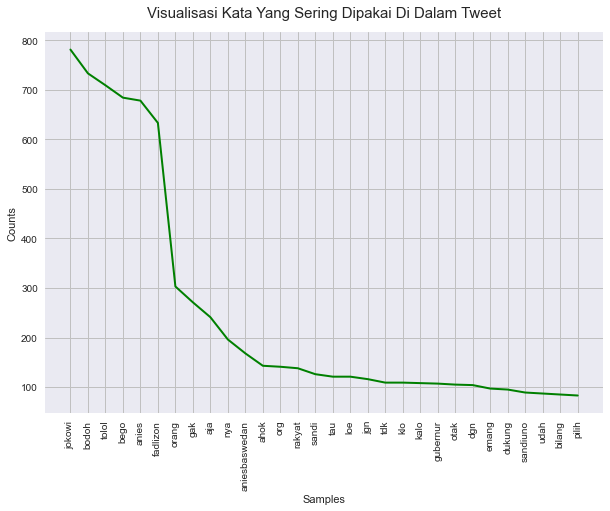

In [37]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["g"])))
fqdist_content.plot(30, cumulative=False)
plt.show()

## 4. Visualisasi Dengan Wordclouds

### Semua Label (Positif & Negatif)

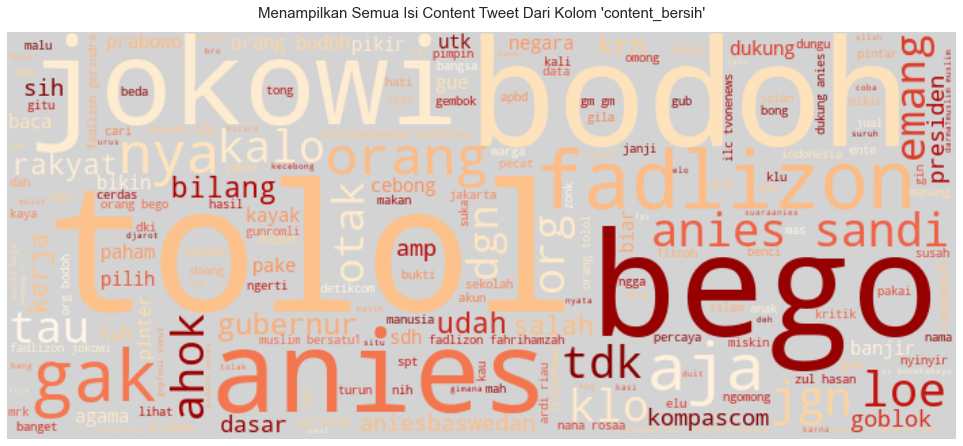

In [21]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_2017" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data_2017["content_bersih"])
wordcloud = WordCloud(colormap="OrRd", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif

In [22]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_2017_label_positif = data_2017[data_2017.label == "positif"]
data_2017_label_positif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif,"[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...",tonywibowo12 michael24007966 triwul82 semiaji ...
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif,"[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...",detikfinance aduh anies jng mgeliatin bego nya...
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif,"[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emang, anies, laku, kmpanye, hitam, dmn, mate...",emang anies laku kmpanye hitam dmn materi tunj...
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif,"[dahnilanzar, anies, itu, toleran, kalau, meng...","[dahnilanzar, anies, toleran, menguntungkan, e...","[dahnilanzar, anies, toleran, untung, ente, be...",dahnilanzar anies toleran untung ente bego pur...
5,2017-12-24 09:14:35+00:00,anies baswedan menurut saya adalah gubernur pa...,positif,"[anies, baswedan, menurut, saya, adalah, guber...","[anies, baswedan, gubernur, bego, dimiliki, ja...","[anies, baswedan, gubernur, bego, milik, jakar...",anies baswedan gubernur bego milik jakarta gub...


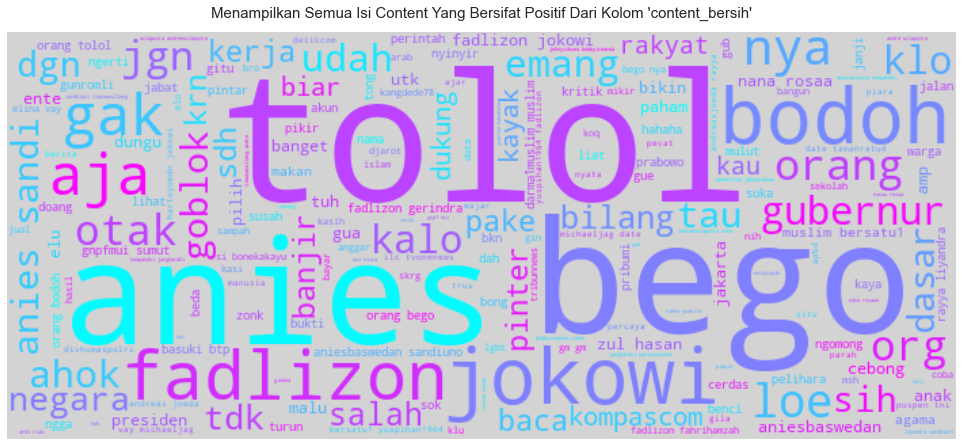

In [23]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_2017_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_2017_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="cool", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [24]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_2017_label_negatif = data_2017[data_2017.label == "negatif"]
data_2017_label_negatif.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif,"[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, harap, menkeu, ralat, n...",pendjaca herditiya1 harap menkeu ralat nyata b...
7,2017-12-23 18:43:39+00:00,jeg likte youtube video https fyojwcreia anies...,negatif,"[jeg, likte, youtube, video, https, fyojwcreia...","[jeg, likte, youtube, video, fyojwcreia, anies...","[jeg, likte, youtube, video, fyojwcreia, anies...",jeg likte youtube video fyojwcreia anies sandi...
8,2017-12-23 17:40:31+00:00,cagubnyinyir padahal lulung sempet2nya mengat...,negatif,"[cagubnyinyir, padahal, lulung, sempet2nya, me...","[cagubnyinyir, lulung, sempet2nya, anies, jeni...","[cagubnyinyir, lulung, sempet2nya, anies, jeni...",cagubnyinyir lulung sempet2nya anies jenius ta...
9,2017-12-23 08:09:13+00:00,anies sandi gubernur mendagri yang bego itu gu...,negatif,"[anies, sandi, gubernur, mendagri, yang, bego,...","[anies, sandi, gubernur, mendagri, bego, guber...","[anies, sandi, gubernur, mendagri, bego, guber...",anies sandi gubernur mendagri bego gubernur me...
14,2017-12-22 02:03:00+00:00,kompascom kok semakin hari semakin tdk karuan...,negatif,"[kompascom, kok, semakin, hari, semakin, tdk, ...","[kompascom, tdk, karuan, menganggap, warga, dk...","[kompascom, tdk, karuan, anggap, warga, dki, b...",kompascom tdk karuan anggap warga dki bego tgu...


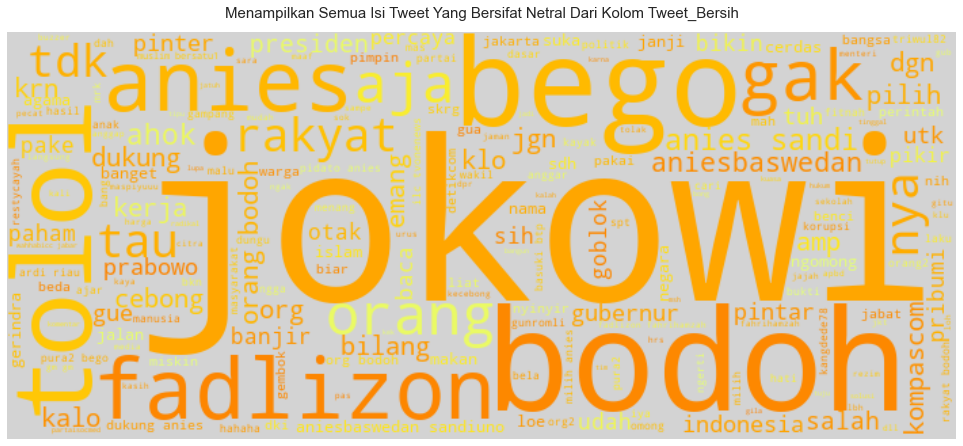

In [25]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_2017_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_2017_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="Wistia", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan Dengan Model Machine Learning

In [26]:
# Menampilkan keseluruhan data dari DataFrame "data_2017"
data_2017.head()

,date,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2017-12-29 08:09:29+00:00,pendjaca herditiya1 berharap menkeu meralat p...,negatif,"[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, berharap, menkeu, meral...","[pendjaca, herditiya1, harap, menkeu, ralat, n...",pendjaca herditiya1 harap menkeu ralat nyata b...
1,2017-12-28 02:12:13+00:00,tonywibowo12 michael24007966 triwul82 semiaji...,positif,"[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...","[tonywibowo12, michael24007966, triwul82, semi...",tonywibowo12 michael24007966 triwul82 semiaji ...
2,2017-12-27 12:32:16+00:00,detikfinance aduh anies jng mgeliatin bego ny...,positif,"[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...","[detikfinance, aduh, anies, jng, mgeliatin, be...",detikfinance aduh anies jng mgeliatin bego nya...
3,2017-12-26 13:01:10+00:00,emangnya anies lakukan kmpanye hitam dmn apa m...,positif,"[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emangnya, anies, lakukan, kmpanye, hitam, dmn...","[emang, anies, laku, kmpanye, hitam, dmn, mate...",emang anies laku kmpanye hitam dmn materi tunj...
4,2017-12-26 08:29:32+00:00,dahnilanzar anies itu toleran kalau menguntun...,positif,"[dahnilanzar, anies, itu, toleran, kalau, meng...","[dahnilanzar, anies, toleran, menguntungkan, e...","[dahnilanzar, anies, toleran, untung, ente, be...",dahnilanzar anies toleran untung ente bego pur...


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [27]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_2017_tfidf = tfidf.fit_transform(data_2017["content_bersih"].astype("U"))
data_2017_tfidf

<1800x7359 sparse matrix of type '<class 'numpy.float64'>'
	with 31265 stored elements in Compressed Sparse Row format>

In [28]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_2017_tfidf, data_2017["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_2017_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data_2017: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.3 yang dimana ukuran dari data test mencapai 30% dan data train mencapai 70%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas.

In [29]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=25) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=25, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [30]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data test supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [31]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("----------------------Prediksi Dari Data Latih---------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'negatif' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'negatif' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positi

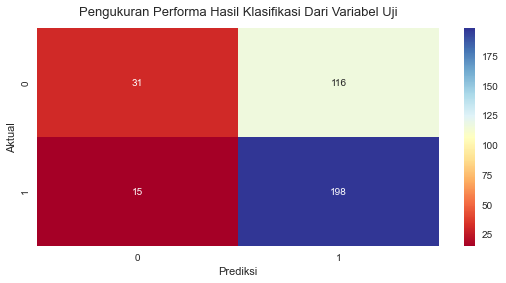

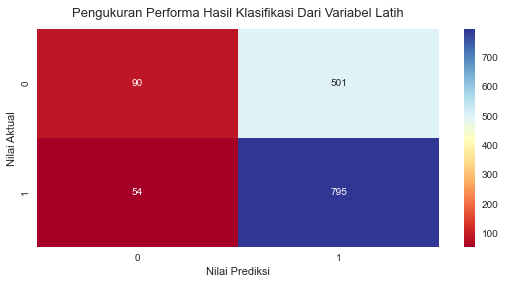

In [32]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 31. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 198. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 116. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 15. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 90. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 795. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 501. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 54. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [33]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.67      0.21      0.32       147
     positif       0.63      0.93      0.75       213

    accuracy                           0.64       360
   macro avg       0.65      0.57      0.54       360
weighted avg       0.65      0.64      0.58       360

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.62      0.15      0.24       591
     positif       0.61      0.94      0.74       849

    accuracy                           0.61      1440
   macro avg       0.62      0.54      0.49      1440
weighted avg       0.62      0.61      0.54      1440



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir

In [34]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data test
content_output_test_2017 = pd.DataFrame({"label": prediction_test})
content_output_test_2017.head()

,label
0,positif
1,negatif
2,negatif
3,positif
4,negatif


In [35]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data train
content_output_train_2017 = pd.DataFrame({"label": prediction_train})
content_output_train_2017.head()

,label
0,positif
1,negatif
2,positif
3,positif
4,positif


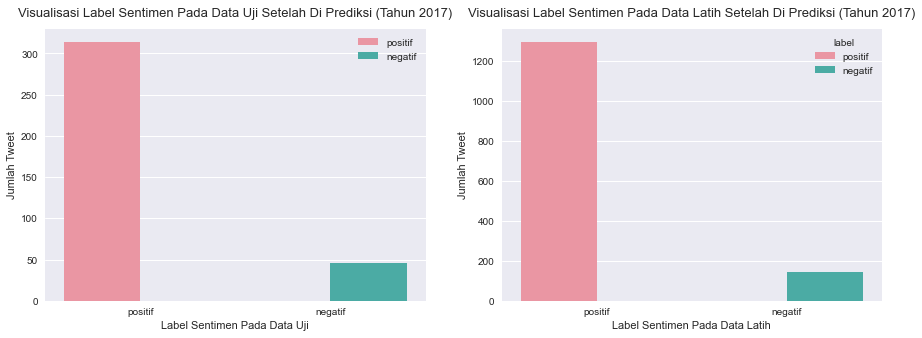

In [36]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test_2017)
plt.title("Visualisasi Label Sentimen Pada Data Uji Setelah Di Prediksi (Tahun 2017)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train_2017)
plt.title("Visualisasi Label Sentimen Pada Data Latih Setelah Di Prediksi (Tahun 2017)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()

Penjelasan dari bar plot sebagai berikut:
- Variabel content_output_test_2017
1. Pada variabel content_output_test_2017 dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 314. Sedangkan pada nilai label "negatif" di variabel content_output_test_2017 memiliki jumlah nilai isi content tweet sebanyak 46. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "positif" lebih banyak daripada nilai label "negatif" yang memiliki selisih nilai sebanyak 268.

- Variabel content_output_train_2017
1. Pada variabel content_output_train_2017 dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 1296. Sedangkan pada nilai label "negatif" di variabel content_output_train_2017 memiliki jumlah nilai isi content tweet sebanyak 144. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "positif" lebih banyak daripada nilai label "negatif" yang memiliki selisih nilai sebanyak 1152 nilai.